In [ ]:
import pandas as pd
from keras.optimizers import Adam

In [ ]:
data=pd.read_csv("mnist_train.csv")
X_train=data.drop('label', axis=1)
y_train=data['label']
adam = Adam(lr = 0.1)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
data1=pd.read_csv("mnist_train.csv")
X_train=data.drop('label', axis=1)
y_train=data['label']

In [ ]:
X = data.drop('label', axis = 1)
y = data['label']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


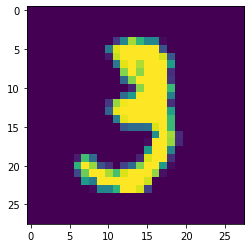

In [ ]:
plt.imshow(X.iloc[10].values.reshape(28, 28))

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D

In [ ]:
X.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
N = X.shape[0]
X_new = X.values.reshape(N, 28, 28, 1)

In [ ]:
X_new.shape

(60000, 28, 28, 1)

In [ ]:
X.shape
## (N, D) ---> (N, Xpixels, Ypixels, number of channels)

(60000, 784)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

In [ ]:
model = Sequential()
model.add(Conv2D( 64, 1, activation = 'relu', input_shape = (28, 28, 1) ))
model.add(MaxPool2D(2))
model.add(Conv2D(32, 3, activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(16, 3, activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.build()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        128       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 16)        

In [ ]:
#learning rate is .1
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=10,batch_size=16)

Epoch 1/10
3000/3000 [==============================] - 46s 15ms/step - loss: 2.3500 - accuracy: 0.1109 - val_loss: 2.2962 - val_accuracy: 0.1243
Epoch 2/10
3000/3000 [==============================] - 44s 15ms/step - loss: 1.0779 - accuracy: 0.6354 - val_loss: 0.4516 - val_accuracy: 0.8611
Epoch 3/10
3000/3000 [==============================] - 45s 15ms/step - loss: 0.2757 - accuracy: 0.9148 - val_loss: 0.1841 - val_accuracy: 0.9419
Epoch 4/10
3000/3000 [==============================] - 44s 15ms/step - loss: 0.1679 - accuracy: 0.9471 - val_loss: 0.1414 - val_accuracy: 0.9531
Epoch 5/10
3000/3000 [==============================] - 44s 15ms/step - loss: 0.1297 - accuracy: 0.9596 - val_loss: 0.1192 - val_accuracy: 0.9622
Epoch 6/10
3000/3000 [==============================] - 44s 15ms/step - loss: 0.1123 - accuracy: 0.9647 - val_loss: 0.1087 - val_accuracy: 0.9671
Epoch 7/10
3000/3000 [==============================] - 45s 15ms/step - loss: 0.0990 - accuracy: 0.9692 - val_loss: 0.1023 -

In [ ]:
test_loss, test_acc=model.evaluate(X_test, y_test)
print('Model 2 Test Accuracy: ', test_acc)

375/375 [==============================] - 3s 6ms/step - loss: 0.0972 - accuracy: 0.9712
Model 2 Test Accuracy:  0.9712499976158142
